# Life Expectancy Datasets

In [68]:
# Dependencies and setup

import pandas as pd
import requests
import matplotlib.pyplot as plt

### Life Expectancy Dataset loaded and cleaned
#### Life_Exp_df

In [69]:
Life_Exp_Male_df = pd.read_csv('Resources/WHO Life Expectancy Male.csv')
Life_Exp_Female_df = pd.read_csv('Resources/WHO Life Expectancy Female.csv')

# Rows with little or no data were removed from CSV file, easier to do in Excel. 

# Columns need to be converted to row data
Life_Exp_Male_df = pd.melt(Life_Exp_Male_df, id_vars = 'Country', var_name = 'Year', value_name = 'Life Expectancy Male')
Life_Exp_Female_df = pd.melt(Life_Exp_Female_df, id_vars = 'Country', var_name = 'Year', value_name = 'Life Expectancy Female')

# Merge Male / Female Data 
Life_Exp_df = pd.merge(Life_Exp_Male_df, Life_Exp_Female_df, on = ['Country', 'Year'], how='inner')

Life_Exp_df['Life Expectancy Avg'] = (Life_Exp_df['Life Expectancy Male'] + Life_Exp_df['Life Expectancy Female']) / 2

# Convert Year to integer
Life_Exp_df['Year'] = Life_Exp_df['Year'].astype(int)

# Reduce decimal places to 1
Life_Exp_df['Life Expectancy Male'] = Life_Exp_df['Life Expectancy Male'].round(1)
Life_Exp_df['Life Expectancy Female'] = Life_Exp_df['Life Expectancy Female'].round(1)
Life_Exp_df['Life Expectancy Avg'] = Life_Exp_df['Life Expectancy Avg'].round(1)


Life_Exp_df.head()

,Country,Year,Life Expectancy Male,Life Expectancy Female,Life Expectancy Avg
0,Aruba,1960,61,68,64
1,Africa Eastern and Southern,1960,42,46,44
2,Afghanistan,1960,32,33,33
3,Africa Western and Central,1960,36,39,38
4,Angola,1960,37,40,38


In [70]:
Life_Exp_df['Country'].nunique()

209

### Population Dataset loaded and cleaned
#### Population_df
#### All_Data_df

In [71]:
Population_df = pd.read_csv('Resources/WHO Population.csv')

# Columns need to be converted to row data
Population_df = pd.melt(Population_df, id_vars = 'Country', var_name = 'Year', value_name = 'Population')

# Convert Year to integer
Population_df['Year'] = Population_df['Year'].astype(int)

# Convert Population cloumn to integer
Population_df['Population'] = Population_df['Population'].astype(int)

# Merge Population with Main dataset
All_Data_df = pd.merge(Life_Exp_df, Population_df,on = ['Country', 'Year'])

All_Data_df.head()

,Country,Year,Life Expectancy Male,Life Expectancy Female,Life Expectancy Avg,Population
0,Aruba,1960,61,68,64,54608
1,Africa Eastern and Southern,1960,42,46,44,130692579
2,Afghanistan,1960,32,33,33,8622466
3,Africa Western and Central,1960,36,39,38,97256290
4,Angola,1960,37,40,38,5357195


### Territory (in Sq Kilometers) loaded and cleaned
#### Territory_df
#### All_Data_df

In [72]:
Territory_df = pd.read_csv('Resources/WB Square km.csv')

Territory_df['Square km'] = Territory_df['Square km'].astype(int)

All_Data_df = pd.merge(All_Data_df, Territory_df, on=['Country'], how='left')

All_Data_df.head()

,Country,Year,Life Expectancy Male,Life Expectancy Female,Life Expectancy Avg,Population,Square km
0,Aruba,1960,61,68,64,54608,180
1,Africa Eastern and Southern,1960,42,46,44,130692579,"14,845,123"
2,Afghanistan,1960,32,33,33,8622466,"652,230"
3,Africa Western and Central,1960,36,39,38,97256290,"9,045,773"
4,Angola,1960,37,40,38,5357195,"1,246,700"


### GDP Dataset loaded and cleaned
#### GDP_df
#### All_Data_df

In [73]:
GDP_df = pd.read_csv('Resources/WHO GDP.csv')

# Columns need to be converted to row data
GDP_df = pd.melt(GDP_df, id_vars = 'Country', var_name = 'Year', value_name = 'GDP')

GDP_df['Year'] = GDP_df['Year'].astype(int)
GDP_df['GDP'] = GDP_df['GDP'].astype(float) 

pd.set_option('display.float_format', '{:,.0f}'.format)

GDP_df.head()

,Country,Year,GDP
0,Aruba,1960,NaN
1,Africa Eastern and Southern,1960,"21,125,015,452"
2,Africa Western and Central,1960,"10,447,637,853"
3,Angola,1960,NaN
4,Albania,1960,NaN


In [74]:
All_Data_df = pd.merge(All_Data_df, GDP_df, on=['Country', 'Year'], how='left')

All_Data_df.head()

,Country,Year,Life Expectancy Male,Life Expectancy Female,Life Expectancy Avg,Population,Square km,GDP
0,Aruba,1960,61,68,64,54608,180,NaN
1,Africa Eastern and Southern,1960,42,46,44,130692579,"14,845,123","21,125,015,452"
2,Afghanistan,1960,32,33,33,8622466,"652,230",NaN
3,Africa Western and Central,1960,36,39,38,97256290,"9,045,773","10,447,637,853"
4,Angola,1960,37,40,38,5357195,"1,246,700",NaN


### OECD GDP Growth Dataset loaded and cleaned
#### GDP_Growth_df
#### All_Data_df

In [75]:
# Load data into dataframe
GDP_Growth_df = pd.read_csv('Resources/OECD GDP Growth Data.csv') 

# Reshape the GDP_Growth_df so that years are listed in rows instead of columns
GDP_Growth_df = pd.melt(GDP_Growth_df, id_vars = 'Country', var_name = 'Year', value_name = 'GDP Growth %')

GDP_Growth_df.replace('no data', pd.NA, inplace=True)
GDP_Growth_df['GDP Growth %'] = pd.to_numeric(GDP_Growth_df['GDP Growth %'], errors='coerce')

GDP_Growth_df['Year'] = GDP_Growth_df['Year'].astype(int)
GDP_Growth_df['GDP Growth %'] = GDP_Growth_df['GDP Growth %'].astype(float)

GDP_Growth_df.head()

,Country,Year,GDP Growth %
0,Afghanistan,1980,NaN
1,Albania,1980,3
2,Algeria,1980,-5
3,Andorra,1980,NaN
4,Angola,1980,2


In [76]:
All_Data_df = pd.merge(All_Data_df, GDP_Growth_df, on = ['Country', 'Year'], how='left')

All_Data_df.head()

,Country,Year,Life Expectancy Male,Life Expectancy Female,Life Expectancy Avg,Population,Square km,GDP,GDP Growth %
0,Aruba,1960,61,68,64,54608,180,NaN,NaN
1,Africa Eastern and Southern,1960,42,46,44,130692579,"14,845,123","21,125,015,452",NaN
2,Afghanistan,1960,32,33,33,8622466,"652,230",NaN,NaN
3,Africa Western and Central,1960,36,39,38,97256290,"9,045,773","10,447,637,853",NaN
4,Angola,1960,37,40,38,5357195,"1,246,700",NaN,NaN


### Clean Water loaded and cleaned
#### Clean_Water_df
#### All_Data_df

In [77]:
Clean_Water_df = pd.read_csv('Resources/WHO Access to Clean Water.csv')

Clean_Water_df = pd.melt(Clean_Water_df, id_vars = 'Country', var_name = 'Year', value_name = '% Population with Clean Water')

Clean_Water_df['Year'] = Clean_Water_df['Year'].astype(int)

Clean_Water_df.head()

,Country,Year,% Population with Clean Water
0,Afghanistan,2000,11
1,Africa Western and Central,2000,15
2,Albania,2000,49
3,Andorra,2000,91
4,Armenia,2000,80


In [78]:
Clean_Water_df['Country'].nunique()

145

In [79]:
All_Data_df = pd.merge(All_Data_df, Clean_Water_df, on = ['Country', 'Year'], how='left')

All_Data_df.head()

,Country,Year,Life Expectancy Male,Life Expectancy Female,Life Expectancy Avg,Population,Square km,GDP,GDP Growth %,% Population with Clean Water
0,Aruba,1960,61,68,64,54608,180,NaN,NaN,NaN
1,Africa Eastern and Southern,1960,42,46,44,130692579,"14,845,123","21,125,015,452",NaN,NaN
2,Afghanistan,1960,32,33,33,8622466,"652,230",NaN,NaN,NaN
3,Africa Western and Central,1960,36,39,38,97256290,"9,045,773","10,447,637,853",NaN,NaN
4,Angola,1960,37,40,38,5357195,"1,246,700",NaN,NaN,NaN


### Sanitation loaded and cleaned
#### Sanitation_df
#### All_Data_df

In [80]:
Sanitation_df = pd.read_csv('Resources/WHO Access to Sanitation.csv')

Sanitation_df = pd.melt(Sanitation_df, id_vars = 'Country', var_name = 'Year', value_name = '% Population with Sanitation')

Sanitation_df['Year'] = Sanitation_df['Year'].astype(int)

Sanitation_df.head()

,Country,Year,% Population with Sanitation
0,Africa Western and Central,2000,16
1,Albania,2000,40
2,Andorra,2000,15
3,Arab World,2000,39
4,United Arab Emirates,2000,NaN


In [81]:
All_Data_df = pd.merge(All_Data_df, Sanitation_df, on=['Country', 'Year'], how='left')

All_Data_df.head()

,Country,Year,Life Expectancy Male,Life Expectancy Female,Life Expectancy Avg,Population,Square km,GDP,GDP Growth %,% Population with Clean Water,% Population with Sanitation
0,Aruba,1960,61,68,64,54608,180,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,1960,42,46,44,130692579,"14,845,123","21,125,015,452",NaN,NaN,NaN
2,Afghanistan,1960,32,33,33,8622466,"652,230",NaN,NaN,NaN,NaN
3,Africa Western and Central,1960,36,39,38,97256290,"9,045,773","10,447,637,853",NaN,NaN,NaN
4,Angola,1960,37,40,38,5357195,"1,246,700",NaN,NaN,NaN,NaN


### GBD Study Cancer loaded

In [82]:
GBD_Cancer_df = pd.read_csv('Resources/IHME GBD Study Cancer.csv')

GBD_Cancer_df.head()

,measure_name,location_id,Country,sex_id,sex_name,age_group_id,age_group_name,cause_id,cause_name,rei_id,...,year_id,year_start_id,year_end_id,metric_id,metric_name,metric_numerator_name,metric_denominator_name,val,upper,lower
0,DALYs (Disability-Adjusted Life Years),1,Global,3,Both,27,Age-standardized,1029,Total cancers,169,...,"2,019",NaN,NaN,NaN,Relative uncertainty in the percent of risk-at...,Difference between 97.5% percentile and 2.5% p...,Total cancer age-standardized rate mean,0,NaN,NaN
1,DALYs (Disability-Adjusted Life Years),33,Armenia,3,Both,27,Age-standardized,1029,Total cancers,169,...,"2,019",NaN,NaN,NaN,Relative uncertainty in the percent of risk-at...,Difference between 97.5% percentile and 2.5% p...,Total cancer age-standardized rate mean,0,NaN,NaN
2,DALYs (Disability-Adjusted Life Years),34,Azerbaijan,3,Both,27,Age-standardized,1029,Total cancers,169,...,"2,019",NaN,NaN,NaN,Relative uncertainty in the percent of risk-at...,Difference between 97.5% percentile and 2.5% p...,Total cancer age-standardized rate mean,0,NaN,NaN
3,DALYs (Disability-Adjusted Life Years),35,Georgia,3,Both,27,Age-standardized,1029,Total cancers,169,...,"2,019",NaN,NaN,NaN,Relative uncertainty in the percent of risk-at...,Difference between 97.5% percentile and 2.5% p...,Total cancer age-standardized rate mean,0,NaN,NaN
4,DALYs (Disability-Adjusted Life Years),36,Kazakhstan,3,Both,27,Age-standardized,1029,Total cancers,169,...,"2,019",NaN,NaN,NaN,Relative uncertainty in the percent of risk-at...,Difference between 97.5% percentile and 2.5% p...,Total cancer age-standardized rate mean,0,NaN,NaN


## GBD Disease Mortality loaded

In [83]:
GBD_Disease_df = pd.read_csv('Resources/IHME GBD Disease Mortality.csv')

GBD_Disease_df.head()

,location_id,location_name,year_id,age_group_id,age_group_name,haq_index_age_type,indicator_id,indicator_name,measure,val,upper,lower
0,6,China,1990,27,Age-standardized,Overall,100,HAQ Index,Index,35,39,32
1,6,China,1990,27,Age-standardized,Overall,297,Tuberculosis,Mortality-to-incidence ratios (MIR),0,0,0
2,6,China,1990,27,Age-standardized,Overall,302,Diarrheal diseases,Mortality-to-incidence ratios (MIR),0,0,0
3,6,China,1990,27,Age-standardized,Overall,322,Lower respiratory infections,Risk-standardised death rates (RSD),0,0,0
4,6,China,1990,27,Age-standardized,Overall,328,Upper respiratory infections,Risk-standardised death rates (RSD),0,0,0


# Life Expectancy Visualizations

## Line Chart showing life expectancy over time

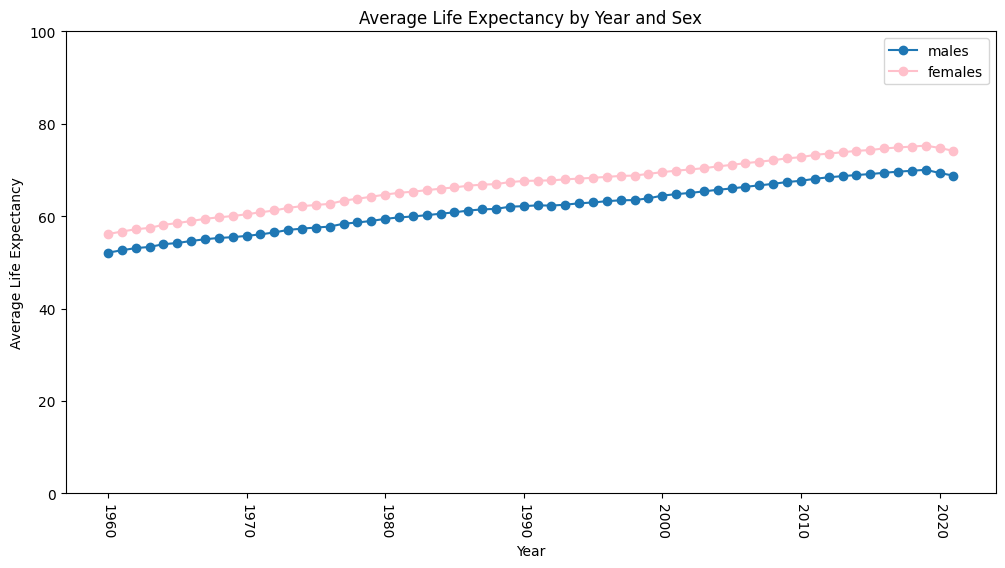

In [84]:
# non-numeric values need to be coerced
Life_Exp_df['Life Expectancy Male'] = pd.to_numeric(Life_Exp_df['Life Expectancy Male'], errors='coerce')
Life_Exp_df['Life Expectancy Female'] = pd.to_numeric(Life_Exp_df['Life Expectancy Female'], errors='coerce')

m_df = Life_Exp_df[Life_Exp_df['Year'] != '2022']
f_df = Life_Exp_df[Life_Exp_df['Year'] != '2022']

# Grouping by 'Year' and 'Status' and calculating average life expectancy
m_grouped_df = m_df.groupby(['Year'])['Life Expectancy Male'].mean().reset_index()
f_grouped_df = f_df.groupby(['Year'])['Life Expectancy Female'].mean().reset_index()

# Creating the line chart
plt.figure(figsize =(12, 6))  

# Line plot for Males
plt.plot(m_grouped_df['Year'], m_grouped_df['Life Expectancy Male'], label='males', marker='o')

# Line plot for Females
plt.plot(f_grouped_df['Year'], f_grouped_df['Life Expectancy Female'], label='females', marker='o', color='pink')

plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy by Year and Sex')
plt.ylim(0, 100)
plt.legend()
plt.xticks(rotation=-90) 

plt.show()

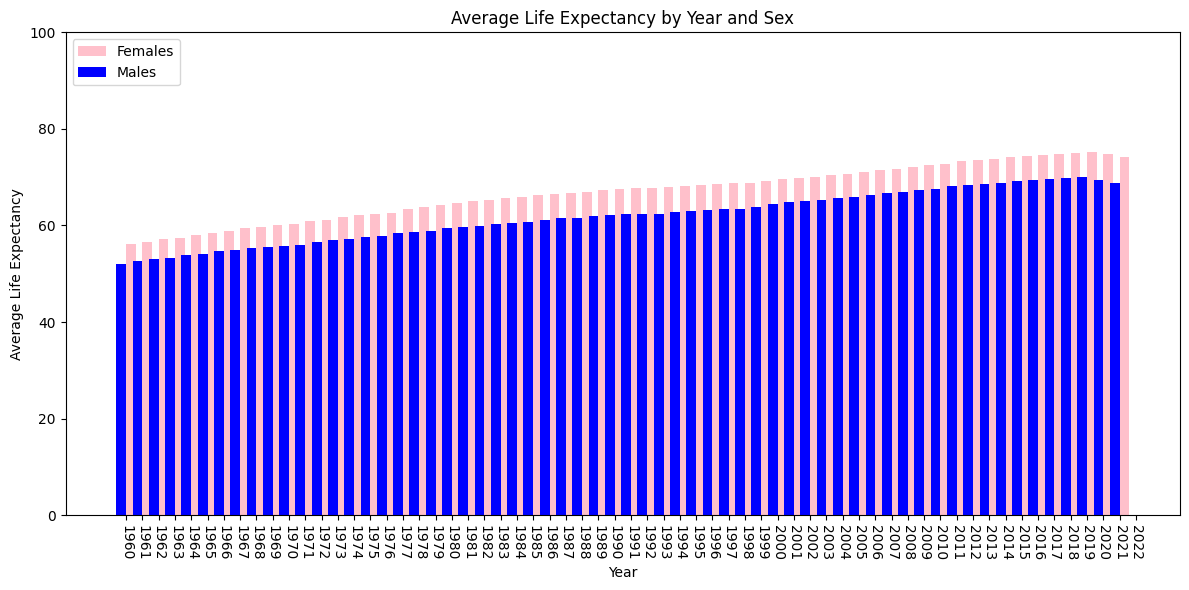

In [190]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'Life_Exp_df' is your DataFrame containing the data

# Coerce non-numeric values to NaN
Life_Exp_df['Life Expectancy Male'] = pd.to_numeric(Life_Exp_df['Life Expectancy Male'], errors='coerce')
Life_Exp_df['Life Expectancy Female'] = pd.to_numeric(Life_Exp_df['Life Expectancy Female'], errors='coerce')

# Filter the data for years other than '2022'
filtered_df = Life_Exp_df[Life_Exp_df['Year'] != '2022']

# Calculate average life expectancy for males and females for each year
grouped_df = filtered_df.groupby(['Year']).agg({
    'Life Expectancy Male': 'mean',
    'Life Expectancy Female': 'mean'
}).reset_index()

# Set the width of each bar
bar_width = 0.6

# Calculate the positions of the bars on the x-axis
years = np.arange(len(grouped_df))
bar_positions_male = years
bar_positions_female = years + bar_width

# Create the stacked bar plot
plt.figure(figsize=(12, 6))

plt.bar(bar_positions_female, grouped_df['Life Expectancy Female'], width=bar_width, label='Females', color='pink')
plt.bar(bar_positions_male, grouped_df['Life Expectancy Male'], width=bar_width, label='Males', color='blue')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy by Year and Sex')
plt.ylim(0, 100)
plt.legend()
plt.xticks(bar_positions_male + bar_width / 2, grouped_df['Year'], rotation=-90)

plt.tight_layout()
plt.show()


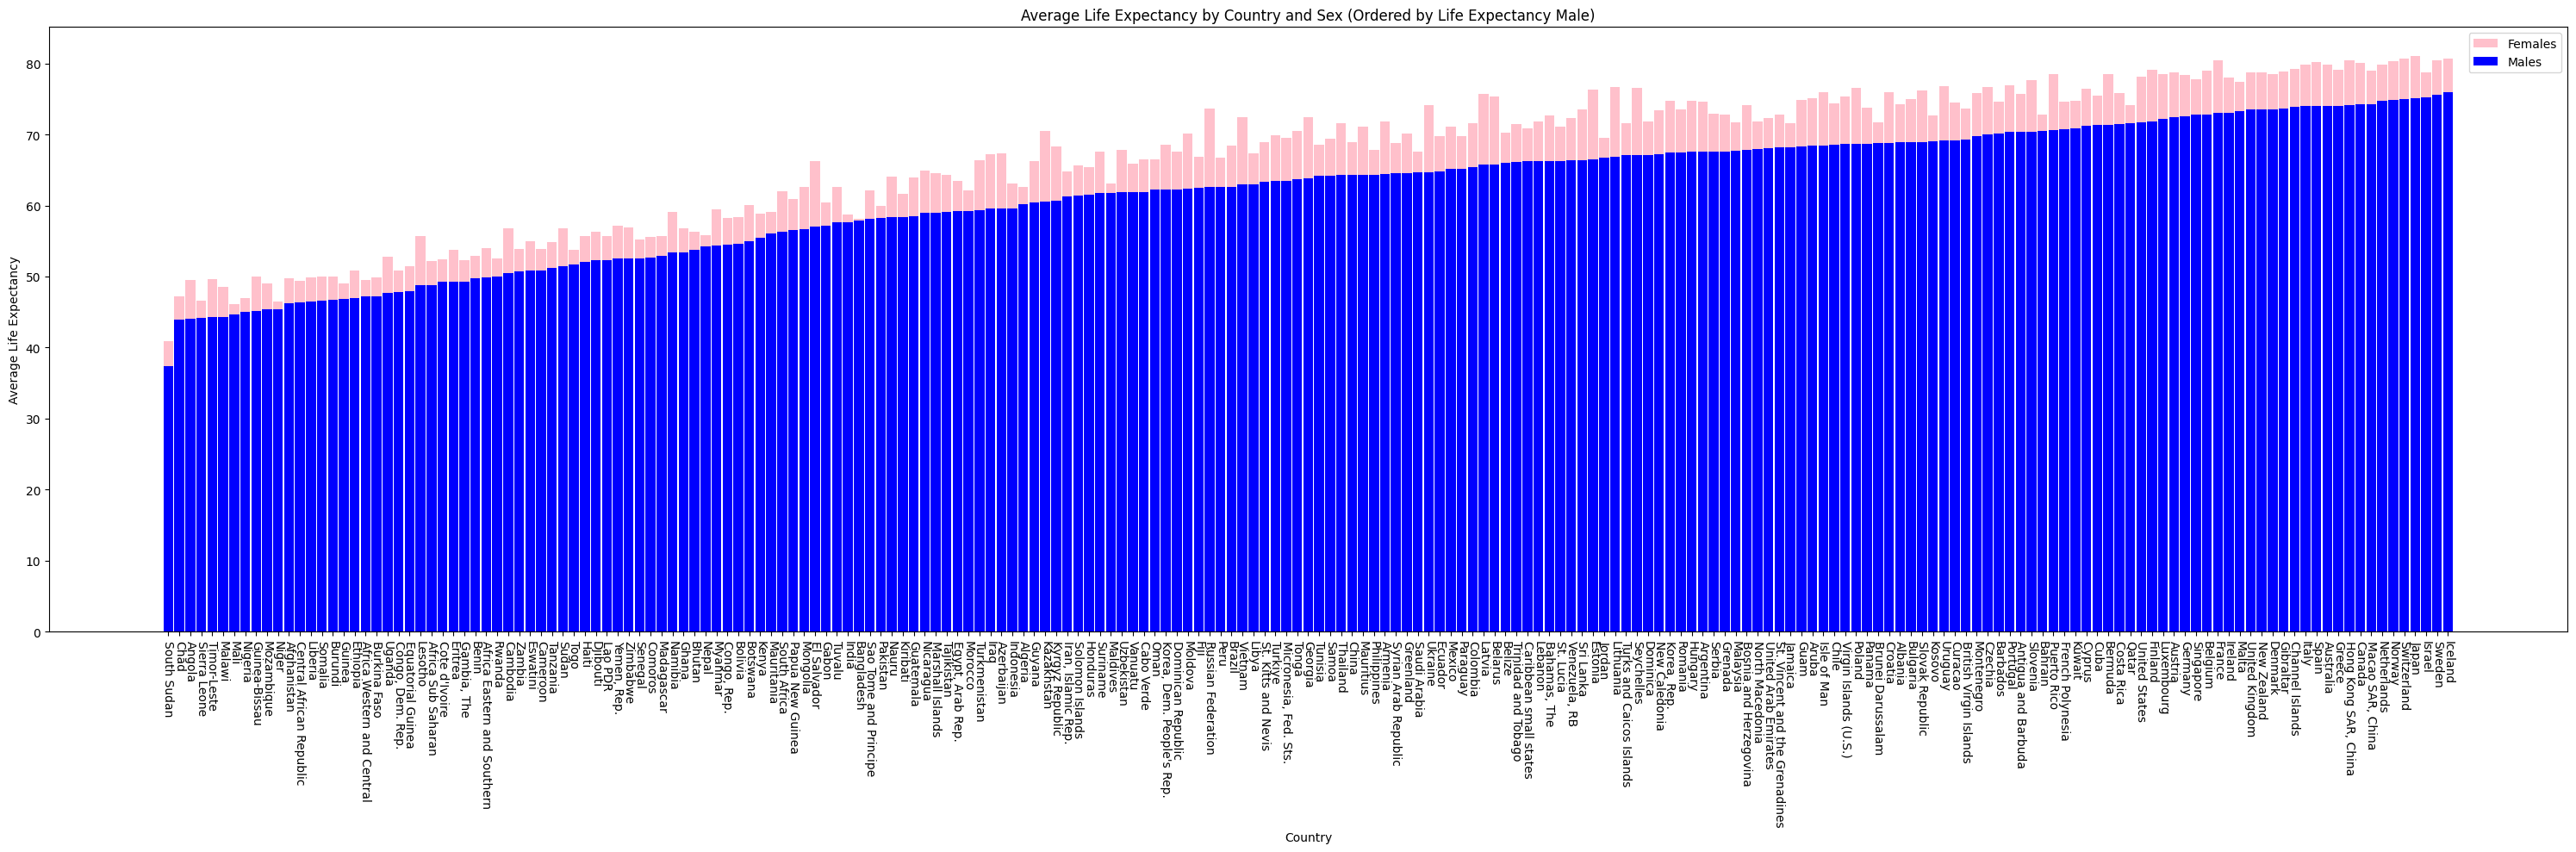

In [184]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'Life_Exp_df' is your DataFrame containing the data

# Coerce non-numeric values to NaN
Life_Exp_df['Life Expectancy Male'] = pd.to_numeric(Life_Exp_df['Life Expectancy Male'], errors='coerce')
Life_Exp_df['Life Expectancy Female'] = pd.to_numeric(Life_Exp_df['Life Expectancy Female'], errors='coerce')

# Filter the data for years other than '2022'
filtered_df = Life_Exp_df[Life_Exp_df['Year'] != '2022']

# Calculate average life expectancy for males and females for each country
grouped_df = filtered_df.groupby(['Country']).agg({
    'Life Expectancy Male': 'mean',
    'Life Expectancy Female': 'mean'
}).reset_index()

# Sort the DataFrame by 'Life Expectancy Male' in ascending order
grouped_df.sort_values(by='Life Expectancy Male', inplace=True)

# Set the width of each bar
bar_width = .9

# Calculate the positions of the bars on the x-axis
countries = np.arange(len(grouped_df))
bar_positions_male = countries
bar_positions_female = countries

# Create the stacked bar plot
plt.figure(figsize=(30, 10))


plt.bar(bar_positions_female, grouped_df['Life Expectancy Female'], width=bar_width, label='Females', color='pink')
plt.bar(bar_positions_male, grouped_df['Life Expectancy Male'], width=bar_width, label='Males', color='blue')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy by Country and Sex (Ordered by Life Expectancy Male)')

plt.legend()
plt.xticks(bar_positions_male, grouped_df['Country'], rotation=-90)

plt.subplots_adjust(left=0, right=0.3)

plt.tight_layout()
plt.show()


## Scatter Plot showing Life Expectancy vs. Population

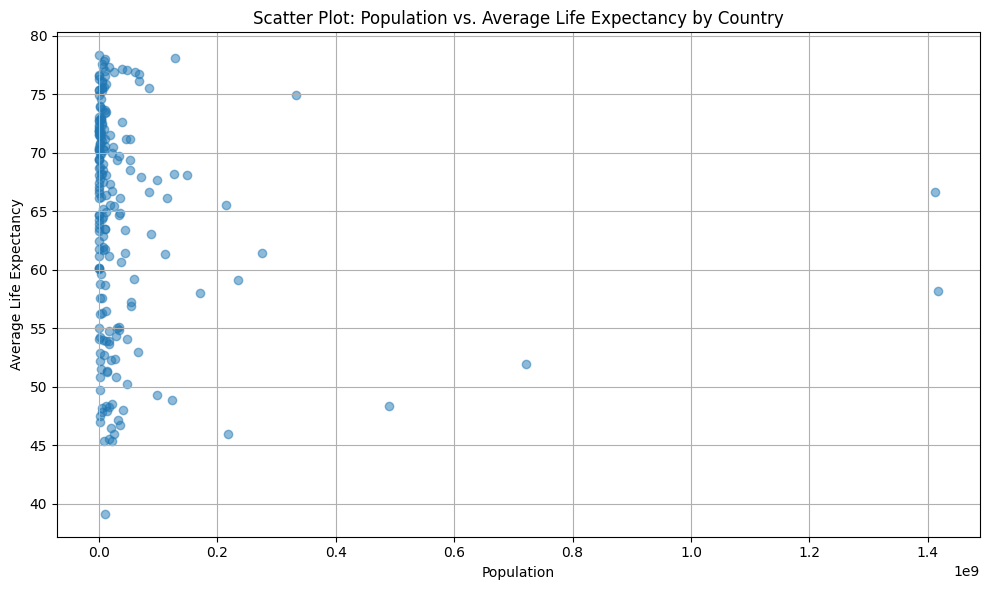

In [133]:
# Convert 'Life Expectancy Male' and 'Life Expectancy Female' columns to numeric, replacing empty strings with NaN
All_Data_df['Life Expectancy Male'] = pd.to_numeric(All_Data_df['Life Expectancy Male'], errors='coerce')
All_Data_df['Life Expectancy Female'] = pd.to_numeric(All_Data_df['Life Expectancy Female'], errors='coerce')

# Calculate the average life expectancy by averaging 'Life Expectancy Male' and 'Life Expectancy Female' columns
All_Data_df['Average Life Expectancy'] = (All_Data_df['Life Expectancy Male'] + All_Data_df['Life Expectancy Female']) / 2

All_Data_df['Population Density'] = (All_Data_df['Square km'] / All_Data_df['Population'])

# Group by 'Country' 
grouped_df = All_Data_df.groupby('Country').agg({
    'Average Life Expectancy': 'mean',
    'Population': 'max'
}).reset_index()

# Remove rows with NaN values (if any) after calculating the average
grouped_df = grouped_df.dropna()

# Reverse the x and y-axis data
x = grouped_df['Population']
y = grouped_df['Average Life Expectancy']

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)

plt.xlabel('Population')
plt.ylabel('Average Life Expectancy')
plt.title('Scatter Plot: Population vs. Average Life Expectancy by Country')

plt.grid(True)
plt.tight_layout()

plt.show()




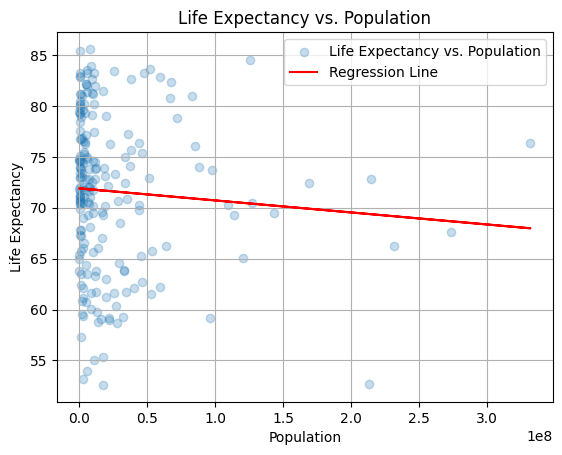

In [102]:
import numpy as np
import matplotlib.pyplot as plt


scatter_data = All_Data_df[(All_Data_df['Year'] == 2021) & (All_Data_df['Population'] < 400000000)].dropna(subset=['Population', 'Life Expectancy Avg'])


x = np.array(scatter_data['Population'])
y = np.array(scatter_data['Life Expectancy Avg'])


# Calculate the regression line using NumPy's polyfit function
coefficients = np.polyfit(x, y, 1)  
regression_line = np.poly1d(coefficients)

# Create the scatter plot
plt.scatter(x, y, alpha=.25, label='Life Expectancy vs. Population')

# Plot the regression line
plt.plot(x, regression_line(x), color='red', label='Regression Line')


# Add labels and legend
plt.xlabel('Population')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs. Population')
plt.legend()
plt.grid()

# Display the plot
plt.show()


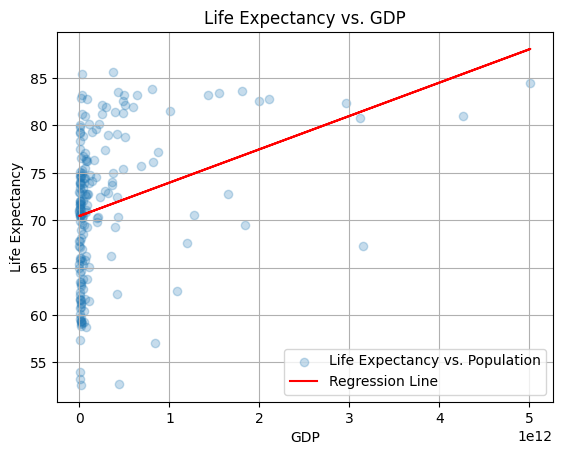

In [112]:
import numpy as np
import matplotlib.pyplot as plt


scatter_data = All_Data_df[(All_Data_df['Year'] == 2021) & (All_Data_df['GDP'] < 10000000000000)]

x = np.array(scatter_data['GDP'])
y = np.array(scatter_data['Life Expectancy Avg'])

# Calculate the regression line using NumPy's polyfit function
coefficients = np.polyfit(x, y, 1)  
regression_line = np.poly1d(coefficients)

# Create the scatter plot
plt.scatter(x, y, alpha=.25, label='Life Expectancy vs. Population')

# Plot the regression line
plt.plot(x, regression_line(x), color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs. GDP')
plt.legend()
plt.grid()

# Display the plot
plt.show()

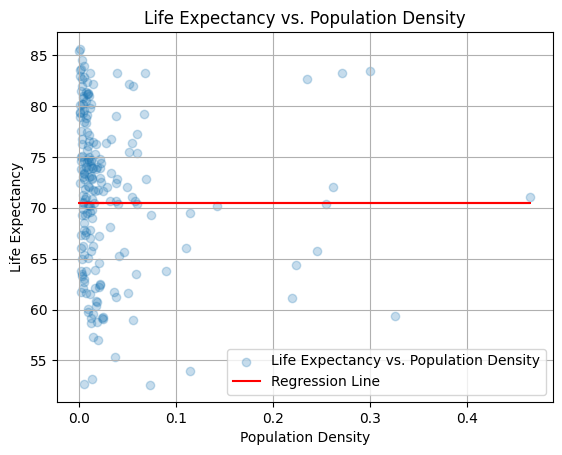

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


scatter_data = All_Data_df[(All_Data_df['Year'] == 2021) & (All_Data_df['Population Density'] < 1)].copy()
scatter_data['Population Density'] = scatter_data['Square km'] / scatter_data['Population']

x = np.array(scatter_data['Population Density'])
y = np.array(scatter_data['Life Expectancy Avg'])

# Calculate the regression line using scipy.stats.linregress
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create the scatter plot
plt.scatter(x, y, alpha=.25, label='Life Expectancy vs. Population Density')

# Plot the regression line
plt.plot(x, regression_line(x), color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('Population Density')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs. Population Density')
plt.legend()
plt.grid()

# Display the plot
plt.show()

## World Map Plot

In [ ]:
import pandas as pd
import folium
import requests


# df = pd.read_csv('indicators.csv')
df = All_Data_df
print(df)

df.head

df['Year'].min(), df['Year'].max()

df[df['Life Expectancy'].str.startswith('L')] ['Life Expectancy']

INDICATOR = 'Life expectancy at birth, total (years)'
data = df[df['Life Expectancy'] ==INDICATOR]
max_year = data['Year'].max()
data = data[data['Year'] == max_year]
data.head()

map_data = data[['CountryCode', 'Value']]
map_data.head()

geojson_url = 'https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/world-countries.json'
response = requests.get(geojson_url)
geojson = response.json ()
geojson
geojson['features'][0]

M = folium.Map(location=[20, 10], zoom_start=2)
folium.Choropleth(
    geo_data=geojson,
    data=map_data,
    columns=['CountryCode', 'Value'],
    key_on='feature.id',
    fill_color='YlGnBu',
    fill_opacity=1,
    line_opacity=0.2,
    legend_name=INDICATOR
).add_to(M)

M


                           Country  Year  Life Expectancy Male  \
0                            Aruba  1960                    61   
1      Africa Eastern and Southern  1960                    42   
2                      Afghanistan  1960                    32   
3       Africa Western and Central  1960                    36   
4                           Angola  1960                    37   
...                            ...   ...                   ...   
13099                       Kosovo  2022                   NaN   
13100                  Yemen, Rep.  2022                   NaN   
13101                 South Africa  2022                   NaN   
13102                       Zambia  2022                   NaN   
13103                     Zimbabwe  2022                   NaN   

       Life Expectancy Female  Life Expectancy Avg  Population  Square km  \
0                          68                   64       54608        180   
1                          46                   44   

KeyError: 'Life Expectancy'

In [ ]:
Outliers_df = grouped_df[Life_Exp_df['Population'] > 40000000]
Outliers_df

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress



# Calculate average BMI and Life Expectancy grouped by 'Country'
avg_data = Life_Exp_Report_df.groupby('Country').mean([['BMI', 'Life Expectancy']])

x_avg = avg_data['BMI']
y_avg = avg_data['Life Expectancy']

plt.figure(figsize=(10, 6))  
plt.scatter(x_avg, y_avg, alpha=0.5)  

plt.xlabel('BMI')
plt.ylabel('Life Expectancy')
plt.title('Scatter Plot: Average BMI vs. Average Life Expectancy by Country')

# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_avg, y_avg)

# Create the linear regression line using the calculated slope and intercept
regression_line = slope * x_avg + intercept

# Plot the linear regression line
plt.plot(x_avg, regression_line, color='red', linewidth=2)

plt.grid(True)
plt.tight_layout()

# Format y-axis labels to display population in millions (if needed)
# plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
# Load the built-in world dataset from geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Generate sample data for visualization
data = {
    'country': ['United States', 'Canada', 'Mexico'],
    'gdp_value': ['United States', 'Canada', 'Mexico']
}
gdp_df = pd.DataFrame(data)
# Merge GeoDataFrame with DataFrame based on country names
merged_gdf = world.merge(gdp_df, left_on='name', right_on='country', how='left')
# Set up the figure and axis
fig, ax = plt.subplots(1, figsize=(12, 8))
# Plot the choropleth map
merged_gdf.plot(column='gdp_value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
# Customize the plot (optional)
ax.set_title('World GDP Choropleth Map')
ax.axis('off')
# Show the plot
plt.show()


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
# Load the built-in world dataset from geopandas
world = gpd.read_file(gpd.datasets.get_path(' '))
# Generate sample data for visualization
data = {
    'country': ['United States', 'Canada', 'Mexico'],
    'gdp_value': ['United States', 'Canada', 'Mexico']
}
gdp_df = pd.DataFrame(data)
# Merge GeoDataFrame with DataFrame based on country names
merged_gdf = world.merge(gdp_df, left_on='name', right_on='country', how='left')
# Set up the figure and axis
fig, ax = plt.subplots(1, figsize=(12, 8))
# Plot the choropleth map
merged_gdf.plot(column='gdp_value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
# Customize the plot (optional)
ax.set_title('World GDP Choropleth Map')
ax.axis('off')
# Show the plot
plt.show()

In [ ]:
# Replace the codes in the 'state' column with the corresponding state names
data['state'] = data['state'].map(state_codes)

# Save the updated dataset to a new CSV file or update the original file if needed
data.to_csv('Updated_BMI_Life_data(State).csv', index=False)